Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "George Massey"
STUDENTID = "230973275"

---

MTH765P - Coursework 2
This is a template notebook for the second assignment  MTH765P,
Closely follow the instructions in this template in order 
to complete the assessment and to obtain full marks. Please only
modify cells where you are instructed to do so. Failure to comply
may result in unexpected errors that can lead to mark deductions.

##### DO NOT FORGET TO REMOVE THE LINE  _raise NotImplementedError()_ after you answer the question.

Author: Primoz Skraba


As usual, we begin by loading the necessary libraries. You should not 
import any other libraries.

In [2]:
import numpy as np
import pandas as pd
import colorsys
import matplotlib.pyplot as plt

 Instructions 
========================

- The instructions are given in this notebook.   
- Make sure you give your answers in the cells below the question
- Remember that unless specified each plot should have a title and axis labels (and a legend there are multiple lines/plots on the same axis). 
- **Do not delete any cells**
- Make sure you follow the naming of the variables according to the instructions.

 Question 1:
===========================

------
------

For this first question, you will generate the random variable X with the code provided. The result is a 200x4 matrix, where each row represents a 4 dimensional point. In the questions below, we refer to coordinates as the 0th, 1st, 2nd, and 3rd coordinates.

---------


In [3]:
## Run this cell to create the dataset
X = np.random.normal(size=[200,4])


-----------------
-----------------
a.) **(10 points)** Create a figure with 4x4 subplots, where the (i,j)-th plot is a scatter plot of the value of the i-th coordinate and the value of the j-th coordinate. Please ensure the following:
 - each pair is shown only once 
 - the plots are clearly visible
 - each row has a different color, starting with row 0: blue, red, green, and black
-----------------


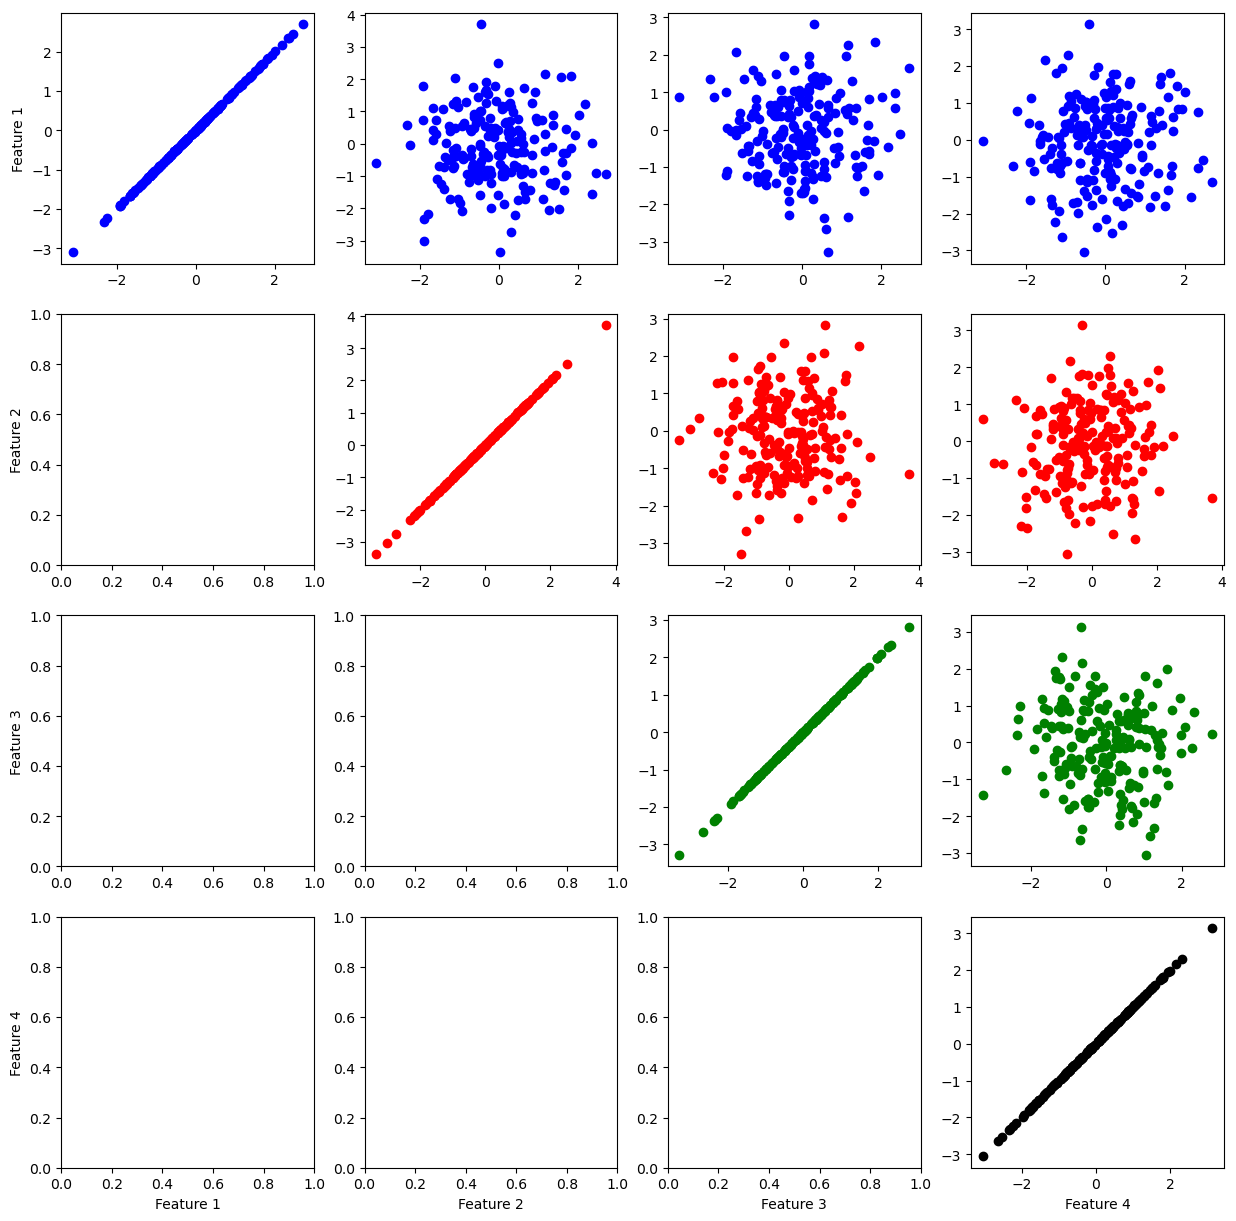

In [4]:
fig, ax = plt.subplots(4,4, figsize=(15,15))
for i in range(0,4):
    for j in range(i,4):
        if i == 0:
            ax[i,j].scatter(X[:,i],X[:,j], color = 'b')
        elif i == 1:
            ax[i,j].scatter(X[:,i],X[:,j], color = 'r')
        elif i == 2:
            ax[i,j].scatter(X[:,i],X[:,j], color = 'g')
        elif i == 3:
            ax[i,j].scatter(X[:,i],X[:,j], color = 'black')
ax[0,0].set_ylabel('Feature 1');
ax[1,0].set_ylabel('Feature 2');
ax[2,0].set_ylabel('Feature 3');
ax[3,0].set_ylabel('Feature 4');
ax[3,0].set_xlabel('Feature 1');
ax[3,1].set_xlabel('Feature 2');
ax[3,2].set_xlabel('Feature 3');
ax[3,3].set_xlabel('Feature 4');

-----------------
-----------------
b.) **(2 points)** What would you change in the above plot to ?


-----------------

I would perhaps find a better way to plot these pairs without having so many empty subplots and with the features also being plotted against themselves. However a good idea may be to plot histograms where i and j are equal to show the distribution of the column of data. This would give us a better idea if the data is normally distributed. 

-----------------
-----------------
c.) **(3 points)** Compute the minimum, maximum and average of each row of X and store them in variables caled _mn_, _mx_, and _avg_. Each should be a 200x1 vector. 

-----------------

In [5]:
mn = np.min(X, axis = 1)
mx = np.max(X, axis = 1)
avg = np.mean(X, axis = 1)

-----------------
-----------------
d.) **(8 points)** Using Matplotlib, on one axis, plot the following:
- Histograms of the minimum, maximum and average of each row of X
- Each histogram should have 20 bins
- All three histograms are completely visible. 

-----------------

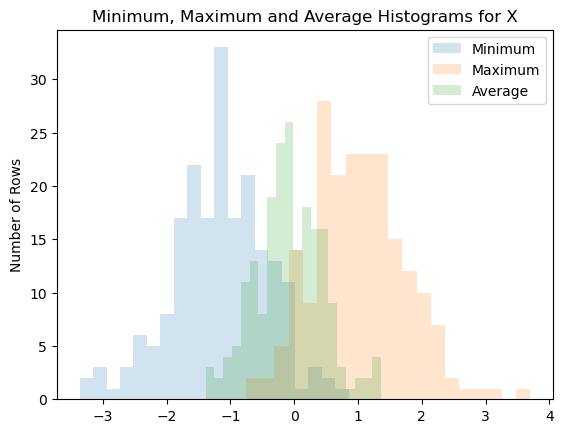

In [6]:
plt.hist(mn,bins=20,label='Minimum',alpha=0.2);
plt.hist(mx,bins=20,label='Maximum',alpha=0.2);
plt.hist(avg,bins=20,label='Average',alpha=0.2);
plt.title('Minimum, Maximum and Average Histograms for X');
plt.ylabel('Number of Rows')
plt.legend();

-----------------
-----------------

e.) **(2 points)** How many rows in X have all coordinates whose absolute value is smaller than 0.6? Store the answer in a variable called _numpts_. **HINT:** The NumPy function _abs()_ may be useful. 

-----------------

In [7]:
# YOUR CODE HERE
numpts = 0
for i in range (0,200):
    if np.abs(X[i,0]) < 0.6 and np.abs(X[i,1]) < 0.6 and np.abs(X[i,2]) < 0.6 and np.abs(X[i,3]) < 0.6:
        numpts = numpts + 1
print(numpts)

7


-----------------
-----------------

f.) **(5 points)** Does the answer in d.) agree with what you see in the figures in a.)? Here I am asking you to interpret the Figure you created in a.) (the scatter plot of pairs of coordinates) with the answer you obtained in d.). Does they agree or do they not? Why or why not? (a few sentences are sufficient).

-----------------

Yes I think my answer to d.) does agree with the figures in a.). The Histograms show that the mean of the data is around 0 and most of the data points are within 2 standard deviation away from the mean. This represents a normal distribution which is accurate as we randomly generated normally distributed data. The subplots also show what looks like normal distributed data where most of the pairs of points group around zero with pairs rarely going further than 2 standard deviations away from the mean. 

 Question 2:
 =====================================

----------------
----------------
a.) **(1 point)** Read in the file **housing.csv** using Pandas into a variable called housing.

----------------

In [8]:
housing = pd.read_csv('housing.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



---------------
---------------
b.) **(2 points)** Remove all the columns which have undefined values. After this part, the variable housing should not contain any undefined values. 

----------------

In [9]:
housing = housing.dropna(axis='columns')
housing.isnull().any().any()

False


---------------
---------------
c.) **(6 points)** Draw the normalised histogram of prices which had Normal sales using 25 bins

----------------

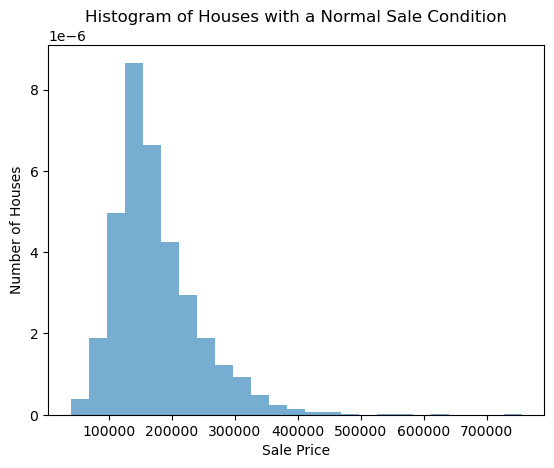

In [10]:
housing.loc[housing['SaleCondition']=='Normal']['SalePrice'].hist(bins = 25, alpha = 0.6, density = True)
plt.title('Histogram of Houses with a Normal Sale Condition')
plt.ylabel('Number of Houses')
plt.xlabel('Sale Price')
plt.grid()


---------------
---------------
d.) **(6 points)** Create a dataframe called **summary** with the year as the index and columns for the minimum, maximum, and mean of the sales prices for each year
 - the names should be minimum, maximum, and mean

----------------

In [11]:
summary = housing.groupby('YrSold').agg({'SalePrice':['min','max','mean']})
summary = summary.rename(columns={'min':'minimum','max':'maximum'})
summary

SalePrice                       
         minimum maximum           mean
YrSold                                 
2006       35311  625000  182549.458599
2007       39300  755000  186063.151976
2008       40000  446261  177360.838816
2009       34900  582933  179432.103550
2010       55000  611657  177393.674286


---------------
---------------

e.) **(5 points)** Plot the minimum, maximum and mean.

---------------

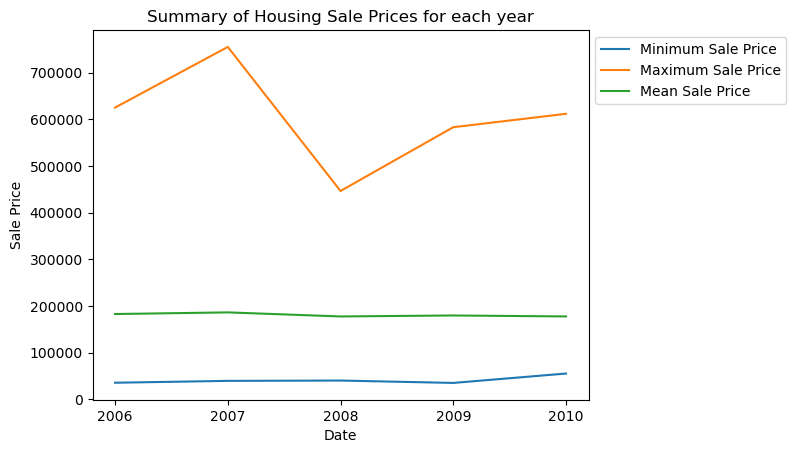

In [12]:
plt.plot(summary['SalePrice']['minimum'], label = 'Minimum Sale Price')
plt.plot(summary['SalePrice']['maximum'], label = 'Maximum Sale Price')
plt.plot(summary['SalePrice']['mean'], label = 'Mean Sale Price');
plt.xlabel('Date')
plt.ylabel('Sale Price')
plt.title("Summary of Housing Sale Prices for each year")
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1));
x_custom_ticks = [2006,2007,2008,2009,2010]
plt.xticks(x_custom_ticks);


 Question 3:
========================

------------------------------------
------------------------------------
a.) **(5 points)** Read the file  **unemployment.csv** into a dataframe called _unemp_ using Pandas 
- Remove any column or row which does not correspond to a country or date
- All invalid values should be given a value of 0
- All columns except the date name should be numeric while the date should be of type datetime
------------------------------------


In [13]:
unemp = pd.read_csv('unemployment.csv')
unemp = unemp.drop([0,1])
unemp[unemp.columns.difference(['Date'])] = unemp[unemp.columns.difference(['Date'])].apply(lambda x:pd.to_numeric(x, errors = 'coerce')).fillna(0)
unemp['Date'] = pd.to_datetime(unemp['Date'], format = 'mixed')
unemp.dtypes

Date               datetime64[ns]
Australia                 float64
Austria                   float64
Belgium                   float64
Canada                    float64
Chile                     float64
Colombia                  float64
Czech Republic            float64
Denmark                   float64
Estonia                   float64
Finland                   float64
France                    float64
Germany                   float64
Greece                    float64
Hungary                   float64
Iceland                   float64
Ireland                   float64
Israel                    float64
Italy                     float64
Japan                     float64
Korea                     float64
Luxembourg                float64
Mexico                    float64
Netherlands               float64
New Zealand               float64
Norway                    float64
Poland                    float64
Portugal                  float64
Slovak Republic           float64
Slovenia      

------------------------------------
------------------------------------
b.) **(2 points)** Set the index to the Date

------------------------------------


In [14]:
unemp = unemp.set_index('Date')
unemp = unemp.sort_index()
unemp

,Australia,Austria,Belgium,Canada,Chile,Colombia,Czech Republic,Denmark,Estonia,Finland,...,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-01,5.1,4.2,5.2,5.6,7.8,10.3,2.0,4.9,4.4,6.8,...,2.9,6.7,5.6,3.8,13.7,6.6,0.0,13.1,3.7,3.5
2020-01-01,5.3,4.4,5.1,5.5,8.1,10.6,2.0,4.9,4.7,6.8,...,3.0,6.8,6.1,4.2,13.8,7.2,0.0,12.6,3.9,3.6
2020-02-01,5.1,4.4,5.0,5.6,8.2,10.8,2.0,4.9,4.7,6.9,...,3.0,6.4,6.1,4.2,13.6,7.6,0.0,12.6,3.9,3.5
2020-03-01,5.2,4.6,5.1,7.8,9.1,12.2,2.1,4.8,4.8,7.0,...,3.0,6.2,5.8,4.3,14.5,6.8,0.0,12.9,3.8,4.4
2020-04-01,6.4,4.7,5.3,13.0,10.9,20.2,2.2,4.9,6.0,7.2,...,3.1,6.3,6.4,4.7,15.3,7.9,0.0,13.6,3.9,14.7
2020-05-01,7.1,5.5,5.4,13.7,11.8,21.2,2.4,5.5,7.0,7.4,...,3.3,5.9,6.5,4.8,15.4,8.5,0.0,14.0,3.8,13.3
2020-06-01,7.4,5.4,5.5,12.3,12.4,20.8,2.7,6.0,8.0,7.6,...,3.3,7.3,6.6,4.8,15.8,9.2,0.0,0.0,0.0,11.1
2020-07-01,7.5,5.2,5.5,10.9,0.0,19.7,2.7,6.0,0.0,7.8,...,3.2,8.1,6.8,4.7,15.8,9.2,0.0,0.0,0.0,10.2
2020-08-01,0.0,0.0,0.0,10.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.4


------------------------------------
------------------------------------
c.) **(5 points)** Create a line plot corresponding to Spain and Colombia using complementary colours (please explicitly make the colours complementary)

------------------------------------

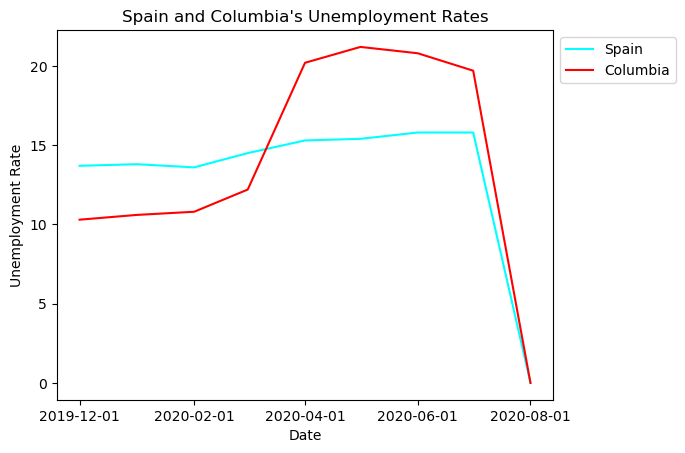

In [15]:
hue = 0.5
plt.plot(unemp['Spain'], c = colorsys.hsv_to_rgb(hue,1,1,) , label = 'Spain');
plt.plot(unemp['Colombia'], c = colorsys.hsv_to_rgb(hue + 0.5,1,1) , label = 'Columbia');
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title("Spain and Columbia's Unemployment Rates")
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1));
custom_ticks = ['2019-12','2020-02','2020-04','2020-06','2020-08']
plt.xticks(custom_ticks);



------------------------------------
------------------------------------
d.) **(8 points)** Complete the function below which takes in an integer and returns N colours equally spaced in hue (with maximum saturation and value/luminance) as rgb values

------------------------------------


In [16]:
def create_colours(N):
    colours=[]
    hue_step = 1.0 / N
    for i in range(N):
        hue = i * hue_step
        rgb_colours = colorsys.hsv_to_rgb(hue,1,1)
        colours.append(rgb_colours)
    return colours


------------------------------------
------------------------------------
e.) **(10 points)** Plot the unemployment rates in 2020 
- include all countries whose names start with a letter which comes before but **not** including G 
- use the colour function you have just written. 

------------------------------------


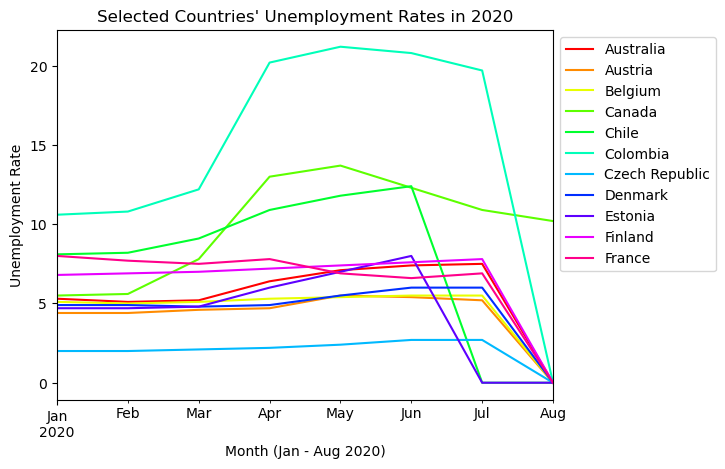

In [17]:
countries = unemp.loc[:, unemp.columns.str[0] < 'G']
num_countries = countries.shape[1]
colours = create_colours(num_countries)
for i, country in enumerate(countries.columns):
        countries.loc['2020-01-01':'2020-08-01'][country].plot(color = colours[i])

plt.xlabel('Month (Jan - Aug 2020)')
plt.ylabel('Unemployment Rate')
plt.title("Selected Countries' Unemployment Rates in 2020")
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1));